TITLE: TWITTER DATA ON COVID-19

# INTRODUCTION
    

Twitter is a popular social network in the United States. As of 2019 Twitter has over 300 million users [1]. Many public figures such as political figures, musical and movie stars use the platform to promote/express their political/personal opinions. Each tweet is limited to 140 characters maximum which is the same as the length of SMS messages. This design is attractive to businesses or politicians to quickly detect users opnions about many topics based on daily users conversations. 

Currently, one of the most popular topics that has captured many users is about the ongoing COVID-19 pandemic. What exactly are people's concerns about with COVID-19? To answer the question, we analyzed the most common 50 words and came up with 3 common categories: health, politics and emotions. In addition, we built supervised machine learning models to classify the tweets automatically. The code below demonstrated step by step how we answered the question and built the models.

# Packages

In [1]:
import nltk 
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import chardet
import string
import sqlite3 as sql
import re
import seaborn as sns
import glob
import os

from nltk.stem import PorterStemmer 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from twython import Twython


In [141]:
import tensorflow as tf

# GET Twitter data with Twython

In [383]:
all_statuses = []
all_tweets = []
base_filenames = ['Covid-Twitter-Data']#, 'COVID-19-Twitter-Data', '2Covid-Twitter-Data']

for i in range(90):
    for x in base_filenames:
        with open(f'{x+"_"}{i}.txt', 'r') as json_file:
            data=json.load(json_file)
            for status in data['statuses']:
                all_statuses.append(status)
                all_tweets.append(status['full_text'])

In [384]:
len(all_statuses), type(all_statuses)

(8990, list)

## Covid-19 Twitter Data 

In [385]:
current_path = os.getcwd()
path = '/Users/kieuha/FinalProjectFlatiron/all-covid-19-twitter-data'
file_location = os.path.join('*.txt')
file_location

filenames = glob.glob(file_location)
print(filenames)
all_statuses = []
all_tweets = []
base_filenames = ['Covid-Twitter-Data', '2Covid-Twitter-Data', 'COVID-19-Twitter-Data']

for i in range(67):
    for x in base_filenames:
        with open(f'{x+"_"}{i}.txt', 'r') as json_file:
            data=json.load(json_file)
            for status in data['statuses']:
                all_statuses.append(status)
                all_tweets.append(status['full_text'])
                
df = pd.DataFrame(all_statuses, columns=['created_at', 'location', 'coordinates', 'full_text'])
df.head()

['2Covid-Twitter-Data_62.txt', '2Covid-Twitter-Data_76.txt', '2Covid-Twitter-Data_89.txt', 'COVID-19-Twitter-Data_65.txt', 'COVID-19-Twitter-Data_59.txt', 'Covid-Twitter-Data_59.txt', 'Covid-Twitter-Data_65.txt', 'Covid-Twitter-Data_71.txt', 'Covid-Twitter-Data_70.txt', 'Covid-Twitter-Data_64.txt', 'Covid-Twitter-Data_58.txt', 'COVID-19-Twitter-Data_58.txt', 'COVID-19-Twitter-Data_64.txt', '2Covid-Twitter-Data_88.txt', '2Covid-Twitter-Data_77.txt', '2Covid-Twitter-Data_63.txt', '2Covid-Twitter-Data_75.txt', '2Covid-Twitter-Data_61.txt', '2Covid-Twitter-Data_49.txt', 'COVID-19-Twitter-Data_66.txt', 'Covid-Twitter-Data_72.txt', 'Covid-Twitter-Data_66.txt', 'Covid-Twitter-Data_67.txt', 'Covid-Twitter-Data_73.txt', '2Covid-Twitter-Data_48.txt', '2Covid-Twitter-Data_60.txt', '2Covid-Twitter-Data_74.txt', '2Covid-Twitter-Data_58.txt', '2Covid-Twitter-Data_70.txt', '2Covid-Twitter-Data_64.txt', 'COVID-19-Twitter-Data_63.txt', 'Covid-Twitter-Data_88.txt', 'Covid-Twitter-Data_77.txt', 'Covid-Tw

,created_at,location,coordinates,full_text
0,Sun Oct 25 10:17:43 +0000 2020,NaN,None,COVID-19 Palliatives: Zahra Buhari reshares a ...
1,Sun Oct 25 10:17:43 +0000 2020,NaN,None,@ScottishSun She’s is a clown and people start...
2,Sun Oct 25 10:17:43 +0000 2020,NaN,None,HEALTH FACTS | COVID-19 SIGNS AND SYMPTOMS (W...
3,Sun Oct 25 10:17:43 +0000 2020,NaN,None,"Say no more, this is brilliant! #covid_19 #ukt..."
4,Sun Oct 25 10:17:42 +0000 2020,NaN,None,covid positive in our school :(


In [386]:
current_path = os.getcwd()
path = '/Users/kieuha/FinalProjectFlatiron/all-covid-19-twitter-data'

In [387]:
file_location = os.path.join('*.txt')

In [388]:
filenames = glob.glob(file_location)

In [389]:
all_statuses = []
all_tweets = []
base_filenames = ['Covid-Twitter-Data', '2Covid-Twitter-Data', 'COVID-19-Twitter-Data']

for i in range(67):
    for x in base_filenames:
        with open(f'{x+"_"}{i}.txt', 'r') as json_file:
            data=json.load(json_file)
            for status in data['statuses']:
                all_statuses.append(status)
                all_tweets.append(status['full_text'])

## Organize the data in a DataFrame format

In [390]:
df = pd.DataFrame(all_statuses, columns=['created_at', 'full_text'])
df.head()

,created_at,full_text
0,Sun Oct 25 10:17:43 +0000 2020,COVID-19 Palliatives: Zahra Buhari reshares a ...
1,Sun Oct 25 10:17:43 +0000 2020,@ScottishSun She’s is a clown and people start...
2,Sun Oct 25 10:17:43 +0000 2020,HEALTH FACTS | COVID-19 SIGNS AND SYMPTOMS (W...
3,Sun Oct 25 10:17:43 +0000 2020,"Say no more, this is brilliant! #covid_19 #ukt..."
4,Sun Oct 25 10:17:42 +0000 2020,covid positive in our school :(


# Tweets Cleaning and Preparation for Analysis

## Removing Short Words

In [391]:
df['full_text'] = df['full_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

The following step generates a list that contains each word in a tweet so that the tweet can be further analyzed. 
Apply function stemSentence to all_tweets to consolidate all words that have similiar meaning. 

## Tokenise a Tweet Text

In [392]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', 
    r'(?:@[\w_]+)', 
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", 
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', 
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', 
    r"(?:[a-z][a-z'\-_]+[a-z])", 
    r'(?:[\w_]+)', 
    r'(?:\S)' 
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def Tokenize(s):
    return tokens_re.findall(s)
 
def Preprocess(s, lowercase=False):
    tokens = Tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [393]:
all_tweets[0:5]

['COVID-19 Palliatives: Zahra Buhari reshares a post stating that President Buhari is not Nigeria’s problem\n\nThe daughter of Nigeria’s president, Zahra Buhari has reshared a post which stated that his father, president Buhari is not the problem of Nigeria.… https://t.co/PrM7Q6SXyP',
 '@ScottishSun She’s is a clown and people starting to see through her. Stating that Covid was nearly eliminated was ridiculous. North Korea’s supreme leader would be proud of her🤣🙈 🙈🙈',
 'HEALTH FACTS  | COVID-19 SIGNS AND SYMPTOMS (WELL EXPLAINED)\n\nhttps://t.co/DhSvJas6VN\n\n#covid19 #covid19signsandsymptoms #covid #pandemic #coronavirus #COVID19 #COVID19 #coronavirus https://t.co/S1SNfCk32L',
 'Say no more, this is brilliant! #covid_19 #uktour #Harrogate #NHSCOVID19app https://t.co/NqQOWVW3iW',
 'covid positive in our school :(']

In [394]:
print("Length of all_tweets:", len(all_tweets))

Length of all_tweets: 20075


In [395]:
df['full_text_tokenize'] = df['full_text'].apply(Preprocess)
df.head()

,created_at,full_text,full_text_tokenize
0,Sun Oct 25 10:17:43 +0000 2020,COVID-19 Palliatives: Zahra Buhari reshares po...,"[COVID, -, 19, Palliatives, :, Zahra, Buhari, ..."
1,Sun Oct 25 10:17:43 +0000 2020,@ScottishSun She’s clown and people starting s...,"[@ScottishSun, She, ’, s, clown, and, people, ..."
2,Sun Oct 25 10:17:43 +0000 2020,HEALTH FACTS COVID-19 SIGNS AND SYMPTOMS (WELL...,"[HEALTH, FACTS, COVID, -, 19, SIGNS, AND, SYMP..."
3,Sun Oct 25 10:17:43 +0000 2020,"Say more, this brilliant! #covid_19 #uktour #H...","[Say, more, ,, this, brilliant, !, #covid_19, ..."
4,Sun Oct 25 10:17:42 +0000 2020,covid positive our school,"[covid, positive, our, school]"


## Tweets Cleaning

The following steps clean the tweets by removing stopwords, unusal characters, punctuations, and finally tokenized the tweets. The outcome of each step is added on to the dataframe. 

In [396]:
def CleanTweet(tweet_full_text):
    return re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', '', tweet_full_text)

def RemoveStopWords(text_tokenized):
    """ text_tokenized: list<str>"""
    punctuation = list(string.punctuation)
    punctuation = [re.escape(x) for x in punctuation]
    stop_words = stopwords.words('english') + punctuation + ['rt', 'via', 'xa0', 'n', '’',\
                                                       'The', 'I', 'nhttps', ':/',\
                                                       'co', 'amp',  'xa0',\
                                                       'If',  '1', '13',  '“', 'irl',\
                                                       '5','S', 'A', '3', 'Is', '7',\
                                                       '10', 'OF', 'th', '12', 'U',\
                                                       "It's", "19", '🌊', '”', '–',\
                                                       '…', ':\\\\', "http\S+", '‘',\
                                                       'https://+']
    def IsNotStopWord(token):
        return not (True in [re.match(pattern, token)!=None for pattern in stop_words])
        #map(lambda pattern: re.match(pattern, token)!=None , stop_words)
        
    return list(filter(IsNotStopWord, text_tokenized))

In [397]:
def SplitWords(tweet_text):
    """tweet_text: str"""
    return tweet_text.split(' ')

In [398]:
df['clean_full_text'] = df['full_text'].apply(CleanTweet)
df['clean_full_text_tokenized'] = df['full_text'].apply(Preprocess)\
                                                .apply(RemoveStopWords)
                                    
df.head()

,created_at,full_text,full_text_tokenize,clean_full_text,clean_full_text_tokenized
0,Sun Oct 25 10:17:43 +0000 2020,COVID-19 Palliatives: Zahra Buhari reshares po...,"[COVID, -, 19, Palliatives, :, Zahra, Buhari, ...",COVID19 Palliatives Zahra Buhari reshares post...,"[COVID, Palliatives, Zahra, Buhari, post, Pres..."
1,Sun Oct 25 10:17:43 +0000 2020,@ScottishSun She’s clown and people starting s...,"[@ScottishSun, She, ’, s, clown, and, people, ...",Shes clown and people starting see through he...,"[clown, people, Covid, eliminated, ridiculous,..."
2,Sun Oct 25 10:17:43 +0000 2020,HEALTH FACTS COVID-19 SIGNS AND SYMPTOMS (WELL...,"[HEALTH, FACTS, COVID, -, 19, SIGNS, AND, SYMP...",HEALTH FACTS COVID19 SIGNS AND SYMPTOMS WELL E...,"[HEALTH, FACTS, COVID, WELL, EXPLAINED]"
3,Sun Oct 25 10:17:43 +0000 2020,"Say more, this brilliant! #covid_19 #uktour #H...","[Say, more, ,, this, brilliant, !, #covid_19, ...",Say more this brilliant covid19 uktour Harroga...,[brilliant]
4,Sun Oct 25 10:17:42 +0000 2020,covid positive our school,"[covid, positive, our, school]",covid positive our school,[positive]


In [399]:
df_ = df.copy()

## Stemming

Removing the suffixes such as, “ing”, “ly”, “es”, “s”, etc. from a word.

In [400]:
ps = PorterStemmer() 
lemmatizer = WordNetLemmatizer()
def Porter(text):
    word_porter = ps.stem(text)
    return word_porter
def Lammatizer(text):   
    word_lammatizer = lemmatizer(text)
    return word_lammatizer

In [401]:
df['porter_lamtizer_text'] = df['clean_full_text_tokenized'].apply(lambda x: ','.join(ps.stem(w) for w in x))
df

,created_at,full_text,full_text_tokenize,clean_full_text,clean_full_text_tokenized,porter_lamtizer_text
0,Sun Oct 25 10:17:43 +0000 2020,COVID-19 Palliatives: Zahra Buhari reshares po...,"[COVID, -, 19, Palliatives, :, Zahra, Buhari, ...",COVID19 Palliatives Zahra Buhari reshares post...,"[COVID, Palliatives, Zahra, Buhari, post, Pres...","covid,palli,zahra,buhari,post,presid,buhari,ni..."
1,Sun Oct 25 10:17:43 +0000 2020,@ScottishSun She’s clown and people starting s...,"[@ScottishSun, She, ’, s, clown, and, people, ...",Shes clown and people starting see through he...,"[clown, people, Covid, eliminated, ridiculous,...","clown,peopl,covid,elimin,ridicul,north,korea,l..."
2,Sun Oct 25 10:17:43 +0000 2020,HEALTH FACTS COVID-19 SIGNS AND SYMPTOMS (WELL...,"[HEALTH, FACTS, COVID, -, 19, SIGNS, AND, SYMP...",HEALTH FACTS COVID19 SIGNS AND SYMPTOMS WELL E...,"[HEALTH, FACTS, COVID, WELL, EXPLAINED]","health,fact,covid,well,explain"
3,Sun Oct 25 10:17:43 +0000 2020,"Say more, this brilliant! #covid_19 #uktour #H...","[Say, more, ,, this, brilliant, !, #covid_19, ...",Say more this brilliant covid19 uktour Harroga...,[brilliant],brilliant
4,Sun Oct 25 10:17:42 +0000 2020,covid positive our school,"[covid, positive, our, school]",covid positive our school,[positive],posit
...,...,...,...,...,...,...
20070,Wed Oct 14 12:41:45 +0000 2020,@KeohaneDan @NvOndarza @DomWalsh13 Exactly. @H...,"[@KeohaneDan, @NvOndarza, @DomWalsh13, Exactly...",Exactly has shown here recently how during...,"[Exactly, Covid, crisis, less, risk, economic,...","exactli,covid,crisi,less,risk,econom,thi,expla..."
20071,Wed Oct 14 12:41:45 +0000 2020,@axios @bjatmcw Why did @Axios feel the need u...,"[@axios, @bjatmcw, Why, did, @Axios, feel, the...",Why did feel the need use this picture acco...,"[Why, feel, use, picture, Tucker, Carlson, FOX...","whi,feel,use,pictur,tucker,carlson,fox,new,lie..."
20072,Wed Oct 14 12:41:45 +0000 2020,@LBC Stammer now kneeling before Covid,"[@LBC, Stammer, now, kneeling, before, Covid]",Stammer now kneeling before Covid,"[kneeling, Covid]","kneel,covid"
20073,Wed Oct 14 12:41:45 +0000 2020,@NASA @Space_Station Taking covid into space🤣🤣,"[@NASA, @Space_Station, Taking, covid, into, s...",Station Taking covid into space,"[Taking, 🤣, 🤣]","take,🤣,🤣"


In [402]:
type(df['porter_lamtizer_text'])

pandas.core.series.Series

In [403]:
all_words = []
for sentence in df['porter_lamtizer_text']:
    for word in sentence.split(','):
        all_words.append(word)
print(all_words)

['covid', 'palli', 'zahra', 'buhari', 'post', 'presid', 'buhari', 'nigeria', 'problem', 'nigeria', 'presid', 'zahra', 'buhari', 'post', 'father', 'presid', 'buhari', 'problem', 'nigeria', 'clown', 'peopl', 'covid', 'elimin', 'ridicul', 'north', 'korea', 'leader', 'would', 'proud', '🤣', '🙈', 'health', 'fact', 'covid', 'well', 'explain', 'brilliant', 'posit', 'dr', 'let', 'perpetu', 'lie', 'keep', 'quiet', 'ward', 'empti', 'how', 'found', 'video', 'covid', 'vulner', 'plagu', 'what', 'covid', 'how', 'trump', 'lie', 'like', 'face', 'look', 'like', 'wildfir', 'know', 'wrong', 'basic', 'even', 'but', 'know', 'ppl', 'use', 'otherwis', 'hoax', 'good', 'morn', 'crystal', 'coast', 'NC', 'oct', 'open', '08', 'fresh', 'produc', 'open', 'wed', 'thu', '6', 'p', 'fri', '8', '6', 'p', '8', 'p', 'compli', 'covid', 'procedur', 'thank', 'patronag', "we'r", 'open', 'market', 'cedar', 'point', 'NC', 'good', 'refus', 'entertain', 'gloomi', 'unless', 'posit', 'happen', 'progress', 'jesu', 'christ', '😳', '😳',

In [404]:
list_dist_all_words = []
for item in all_words:
    if len(item)>2:
        list_dist_all_words.append(item)

### Graph 50 the most Common Words

In [405]:
from nltk.probability import FreqDist
fdist = FreqDist(list_dist_all_words)
print("length of all_words:", len(fdist))

length of all_words: 9038


In [406]:
def freq_dist (word):
    freq_dist_list = FreqDist(word)
    return freq_dist_list

In [407]:
most_common_50_words = fdist.most_common(50)
graph_50 = [(elem1, elem2)for elem1, elem2 in most_common_50_words]

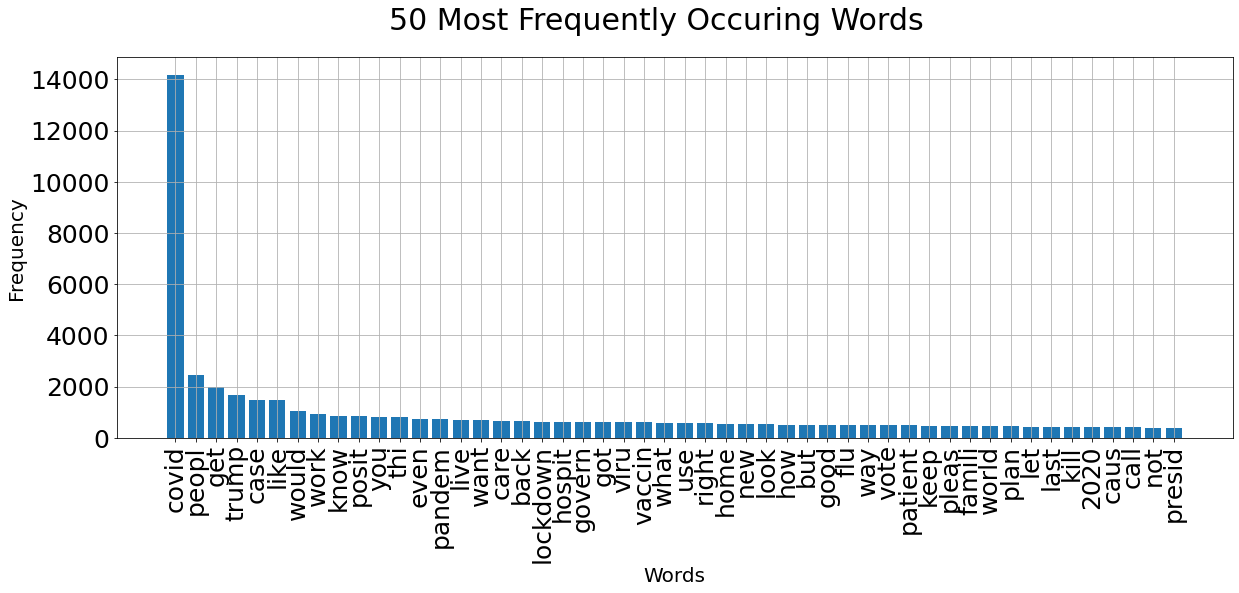

In [408]:
plt.figure(figsize=(20,7))
plt.bar(*zip(*graph_50))
plt.suptitle('50 Most Frequently Occuring Words', fontsize=30)
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.grid(True)
plt.show()

In [409]:
most_common_50_words

[('covid', 14155),
 ('peopl', 2440),
 ('get', 1985),
 ('trump', 1691),
 ('case', 1491),
 ('like', 1465),
 ('would', 1066),
 ('work', 911),
 ('know', 858),
 ('posit', 832),
 ('you', 813),
 ('thi', 797),
 ('even', 742),
 ('pandem', 722),
 ('live', 700),
 ('want', 681),
 ('care', 667),
 ('back', 659),
 ('lockdown', 636),
 ('hospit', 634),
 ('govern', 627),
 ('got', 619),
 ('viru', 614),
 ('vaccin', 604),
 ('what', 572),
 ('use', 566),
 ('right', 560),
 ('home', 540),
 ('new', 535),
 ('look', 521),
 ('how', 518),
 ('but', 514),
 ('good', 508),
 ('flu', 506),
 ('way', 500),
 ('vote', 484),
 ('patient', 481),
 ('keep', 469),
 ('pleas', 467),
 ('famili', 467),
 ('world', 459),
 ('plan', 446),
 ('let', 436),
 ('last', 434),
 ('kill', 423),
 ('2020', 420),
 ('caus', 417),
 ('call', 405),
 ('not', 402),
 ('presid', 395)]

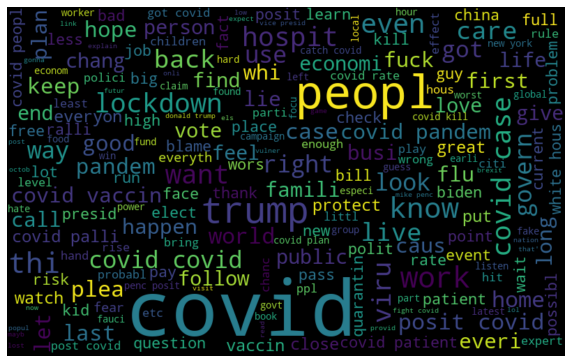

In [410]:
all_words = ' '.join([text for text in list_dist_all_words])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110)\
            .generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

CVOID is the most frequent word among the tweets since the tweets were gathered about COVID. Other frequent words are about health such as flu, covid cases, pandem, positive covid, vaccin, china, kill, and patient. Words about politics includes Trump, bill, lockdown, govern, white house, power, vote, party, and campaign. The data is further analyzed based on these 3 categories. 

# Machine Learning Modeling

## Generate Labeled Twitter DataFrame

Four hundred tweets were labeled as "0" or "1" for the follwong categories: health, politics, and emotions. "0" means not about that category and "1" means it's about the category. The data was saved in a new dataframe called "df_twitter_label".

In [411]:
current_path = os.getcwd()
path_label = '/Users/kieuha/FinalProjectFlatiron/ProjectCOVID19Data/covid-19-twitter-label.csv'
df_twitter_labeled = pd.read_csv(path_label)

In [412]:
df_twitter_labeled.head(5)

,Unnamed: 0,created_at,id,health,politics,emotions,full_text,full_text_tokenize,clean_full_text,clean_full_text_tokenized,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,0,Sat Oct 24 06:33:50 +0000 2020,1.319890e+18,0,0,0,could urged keep windows open effort curb Covi...,"['could', 'urged', 'keep', 'windows', 'open', ...",could urged keep windows open effort curb Covi...,"['urged', 'keep', 'windows', 'effort', 'curb',...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sat Oct 24 06:33:50 +0000 2020,1.319890e+18,0,0,1,@jamesjyu Dreams? Looking after friend's house...,"['@jamesjyu', 'Dreams', '?', 'Looking', 'after...",Dreams Looking after friends house for few da...,"['Dreams', 'Looking', ""friend's"", 'house', 'Ma...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sat Oct 24 06:33:49 +0000 2020,1.319890e+18,0,0,1,@dr_shibley Money causes most mum’s anxieties....,"['@dr_shibley', 'Money', 'causes', 'most', 'mu...",shibley Money causes most mums anxieties Shes ...,"['Money', 'causes', 'used', 'cash', 'Covid', '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Sat Oct 24 06:33:49 +0000 2020,1.319890e+18,0,0,1,Covid breakup like: leme call discord and cry,"['Covid', 'breakup', 'like', ':', 'leme', 'cal...",Covid breakup like leme call discord and cry,"['Covid', 'breakup', 'like', 'leme', 'call', '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Sat Oct 24 06:33:49 +0000 2020,1.319890e+18,0,1,0,Released emails show Fauci signed off WHO-spon...,"['Released', 'emails', 'show', 'Fauci', 'signe...",Released emails show Fauci signed off WHOspons...,"['Released', 'emails', 'Fauci', 'WHO-sponsored...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [413]:
X_list = df_twitter_labeled['clean_full_text_tokenized']\
         .apply(lambda x: x.lower()\
                           .replace("[", "")\
                           .replace("]", "")\
                           .replace("'","")\
                           .replace(" ", "")\
                           .split(",")
                )
word_to_index = dict()
index_to_word = dict()
index = 0
for row in X_list:
    for word in row:
        if word not in word_to_index:
            word_to_index[word] = index
            index_to_word[index] = word
            index += 1
X = []
for row in X_list:
    feature_values = [0.]*len(word_to_index)
    for word in row:
        feature_values[word_to_index[word]] = 1.
    X.append(feature_values)
    
X = np.array(X)   

In [414]:
X_list

0            [urged, keep, windows, effort, curb, covid]
1      [dreams, looking, "friends", house, masks, far...
2      [money, causes, used, cash, covid, getting, fo...
3                [covid, breakup, like, leme, call, cry]
4      [released, emails, fauci, who-sponsored, "chin...
                             ...                        
394           [looming, cuts, covid, payments, worrying]
395    [want, pay, house, lost, job, pls, 2063980608,...
396                       [child, covid, hot, use, face]
397                 [didn, call, national, guard, covid]
398    [respectfully, curious, why, fauci, drs, world...
Name: clean_full_text_tokenized, Length: 399, dtype: object

In [415]:
combined_text = []
for row in X_list:
    for word in row:
          combined_text.append(word)

In [416]:
combined_text

['urged',
 'keep',
 'windows',
 'effort',
 'curb',
 'covid',
 'dreams',
 'looking',
 '"friends"',
 'house',
 'masks',
 'far',
 'going',
 'waking',
 'want',
 'home',
 'fear',
 'back',
 'money',
 'causes',
 'used',
 'cash',
 'covid',
 'getting',
 'food',
 'paying',
 'calls',
 'constant',
 'question',
 'covid',
 'breakup',
 'like',
 'leme',
 'call',
 'cry',
 'released',
 'emails',
 'fauci',
 'who-sponsored',
 '"chinas"',
 'covid',
 'wow',
 'check',
 'video',
 'luke',
 'volunteers',
 'help',
 'expose',
 'nhs',
 'covid',
 'test',
 'fraud',
 'new',
 'covid',
 'cases',
 'rose',
 '80',
 '000',
 'johns',
 'hopkins',
 'virus',
 'hard',
 'hit',
 'worse',
 'can',
 't',
 'differentiate',
 'covid',
 'because',
 'they',
 'both',
 'have',
 'breathing',
 'house',
 'bound',
 'people',
 'wife',
 'last',
 'wife',
 'gave',
 'why',
 'would',
 'republicans',
 'people',
 'plan',
 'covid',
 'fix',
 'loan',
 'environmental',
 'plan',
 'equality',
 'women',
 'lgtbqia',
 'people',
 'esteem',
 'boost',
 'good',
 '

In [417]:
from sklearn.feature_extraction.text import TfidfVectorizer

clean_full_text = df_twitter_labeled['clean_full_text'].apply(lambda x: x.lower())

vectorizer = TfidfVectorizer()
vectorizer.fit(clean_full_text)
X = vectorizer.transform(clean_full_text)
print(vectorizer.get_feature_names())

['000', '08122221571', '10', '100', '1000', '100000', '101420', '10pm', '12', '13', '130', '1300s', '14', '14th', '14tive', '16348', '19', '200', '2000', '2002', '2006', '2019', '2020', '2021', '2022', '2063980608', '215000', '22', '220000', '220k', '222000', '225000', '23rd', '245', '24th', '25000', '25th', '27', '28', '2bn', '300k', '308', '30s', '311', '350000', '3ms', '3rd', '4th', '500', '5000', '53', '61', '63m', '6b1', '700800s', '750', '75th', '77', '800', '80000', '8020', '866', '8am', '8pm', '958', '96', '995', 'aaaaaaaaaaaaaaaaaa', 'aaron', 'able', 'aborted', 'about', 'above', 'absolute', 'absolutely', 'abt', 'aca', 'academic', 'accompany', 'according', 'account', 'accused', 'achocluts', 'acquired', 'across', 'act', 'action', 'active', 'actually', 'add', 'addiction', 'address', 'adds', 'adhere', 'adjusts', 'admin', 'admit', 'admitting', 'adopt', 'adoring', 'adulation', 'advance', 'advertising', 'advice', 'advisories', 'advocate', 'affected', 'affects', 'afloat', 'africa', 'a

## Modeling for Health Category

In [418]:
y_health = df_twitter_labeled['health']

In [419]:
X.shape, y_health.shape

((399, 2679), (399,))

In [420]:
X_train, X_test, yh_train, yh_test = train_test_split(X, y_health)

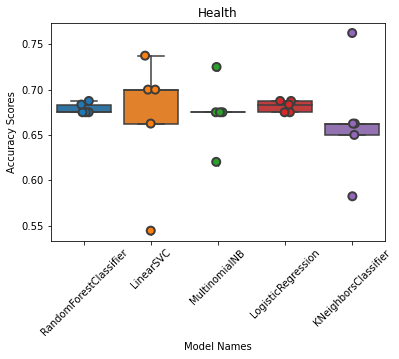

model_name
KNeighborsClassifier      0.663956
LinearSVC                 0.668861
LogisticRegression        0.681709
MultinomialNB             0.674051
RandomForestClassifier    0.679209
Name: accuracy, dtype: float64


In [421]:
np.random.seed(0)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

models =    [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    KNeighborsClassifier()
            ]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y_health.values.ravel(), scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
# Graphing
ax = sns.boxplot(x='model_name', y='accuracy', data=cv_df)
ax = sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation=45)
plt.title("Health") 
ax.set(xlabel='Model Names', ylabel='Accuracy Scores')
plt.show()
print(cv_df.groupby('model_name').accuracy.mean())

## Modeling for Politics Category

In [422]:
y_politics = df_twitter_labeled['politics']
X.shape, y_politics.shape

((399, 2679), (399,))

In [423]:
X_train, X_test, yp_train, yp_test = train_test_split(X, y_politics)

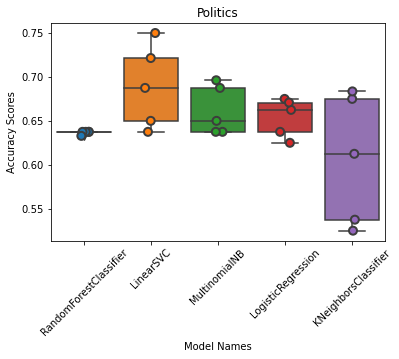

model_name
KNeighborsClassifier      0.606709
LinearSVC                 0.689304
LogisticRegression        0.654177
MultinomialNB             0.661741
RandomForestClassifier    0.636582
Name: accuracy, dtype: float64


In [424]:
np.random.seed(0)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models =    [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    KNeighborsClassifier()
            ]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y_politics.values.ravel(), scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
# Graphing
ax = sns.boxplot(x='model_name', y='accuracy', data=cv_df)
ax = sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation=45)
plt.title("Politics") 
ax.set(xlabel='Model Names', ylabel='Accuracy Scores')
plt.show()
print(cv_df.groupby('model_name').accuracy.mean())

## Modeling for Emotion Category

In [425]:
y_emotions = df_twitter_labeled['emotions']
X.shape, y_emotions.shape

((399, 2679), (399,))

In [426]:
X_train, X_test, ye_train, ye_test = train_test_split(X, y_emotions)

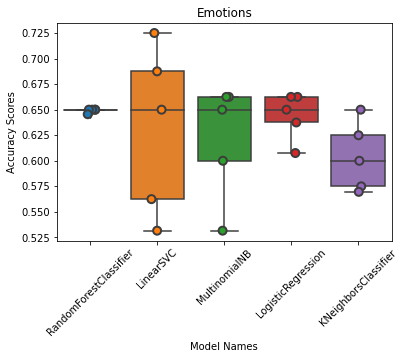

model_name
KNeighborsClassifier      0.603924
LinearSVC                 0.631329
LogisticRegression        0.644019
MultinomialNB             0.621329
RandomForestClassifier    0.649114
Name: accuracy, dtype: float64


In [427]:
np.random.seed(0)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models =    [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    KNeighborsClassifier()
            ]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y_emotions.values.ravel(), scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
# Graphing
ax = sns.boxplot(x='model_name', y='accuracy', data=cv_df)
ax = sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation=45)
plt.title("Emotions") 
ax.set(xlabel='Model Names', ylabel='Accuracy Scores')
plt.show()
print(cv_df.groupby('model_name').accuracy.mean())

Five models (KNN, Linear, Logistics, MultiNomia and Random Forest) were used to analyzed for accuracy. Random Forest Classifier performs the best compared to MultinomialNB (Naive Bayes), Logistic Regression, LinearSVC and KNeighbor Classifier. Overall, the models classified the tweets with accuracy slitghly better than to leave it to chance. There are multiple reasons The training data is the key input to a machine learning model. In general, the more training data a model is trained with, the better it performs on predicting the unknown data. Ideally, the data The data used to train the models on only contained 400 tweets. The models recognized limitted words and pharases. 

The best peformance model is chosen for prediction of an unlabeled tweet.

# Examples of tweets that predict positive

In [428]:
politics_model = LogisticRegression(random_state=0)
politics_model.fit(X_train, yp_train)
results = (politics_model.predict(X_test) == yp_test)
print("politics accuracy", len(results[results==True])/len(results))

health_model = LogisticRegression(random_state=0)
health_model.fit(X_train, yh_train)
results = (politics_model.predict(X_test) == yh_test)
print("health accuracy", len(results[results==True])/len(results))

emotions_model = LogisticRegression(random_state=0)
emotions_model.fit(X_train, ye_train)
results = (politics_model.predict(X_test) == ye_test)
print("emotions accuracy", len(results[results==True])/len(results))

politics accuracy 0.68
health accuracy 0.66
emotions accuracy 0.64


In [429]:
x = vectorizer.transform(df['clean_full_text'])
sum(politics_model.predict(x))

291

In [430]:
sum(1 - yp_test) / len(yp_test)

0.62

In [431]:
tweet = "Dear USA, people please save the usps and stay "\
             "covid safe by directly dropping off your ballots "\
             "to county election offices. Vote please!"

print(tweet)
tweet = CleanTweet(tweet)
tweet = tweet.lower()
temp = Tokenize(tweet)
temp = RemoveStopWords(temp)
temp = " ".join(temp)
print("\n",temp)
x = vectorizer.transform([temp])
politics_model.predict(x)

Dear USA, people please save the usps and stay covid safe by directly dropping off your ballots to county election offices. Vote please!

 usa people please usps ballots election vote please


array([1])

# Conclusion

The popular topics that related to COVID-19 is about physical health, emotional health and politics. Since March, in order to save lives, many cities in the United States have issued stay-at-home orders. This has hugely affected people many different ways from working, schooling and entertainining while staying safe and healthy. In addition, the presidential election is comming up in November also poses higer risk for COVID-19 spread because many Americans will come out to cast thier ballots especially in those states that don't have the option for mail-in ballots. It would be interesting to see how the machine learning model performs on future tweets and compare to this data. 